# 动力学方程的数值解（动力学方程+行星运动轨道）

*******
## 计算动力学方程

动力学方程的数值解

例如，动力学方程如下：

$-kx = m\frac{dv}{dt}$

如果假设 $k/m = 1$, 则:

$-x = \frac{dv}{dt}$

假设初始状态为: $t=0$, $x=1, v=0$.

令 $\varepsilon = 0.01s$, 可以得到:

$x(t+\varepsilon) = x(t) + \varepsilon * v(t)$

$v(t+\varepsilon) = v(t) + \varepsilon * a(t)$

又因为:

$a(t) = \frac{dv}{dt} = -x(t)$

所以:

$x(t+\varepsilon) = x(t) + \varepsilon * v(t)$

$v(t+\varepsilon) = v(t) - \varepsilon * x(t)$

通过缩小$\varepsilon$我们就能得到更精确的数值解了

*******
### 导入需要的包

In [2]:
using DataFrames
using Plots
using LaTeXStrings

In [3]:
#设定初始值
ε = 0.1
t = [0+i*ε for i = 0:80]
#x = 1, t = 0, v = 0
x = fill(1.0, size(t))
v = fill(0.0, size(t))
a = fill(-1.0, size(t))

#计算
for i = 2:length(t)
	x[i] = x[i-1] + ε * v[i-1]
	v[i] = v[i-1] - ε * x[i-1]
	a[i] = -x[i]
end

In [4]:
DataFrame(t=t, x=x, v=v, a=a)

,t,x,v,a
,Float64,Float64,Float64,Float64
1,0.0,1.0,0.0,-1.0
2,0.1,1.0,-0.1,-1.0
3,0.2,0.99,-0.2,-0.99
4,0.3,0.97,-0.299,-0.97
5,0.4,0.9401,-0.396,-0.9401
6,0.5,0.9005,-0.49001,-0.9005
7,0.6,0.851499,-0.58006,-0.851499
8,0.7,0.793493,-0.66521,-0.793493
9,0.8,0.726972,-0.744559,-0.726972


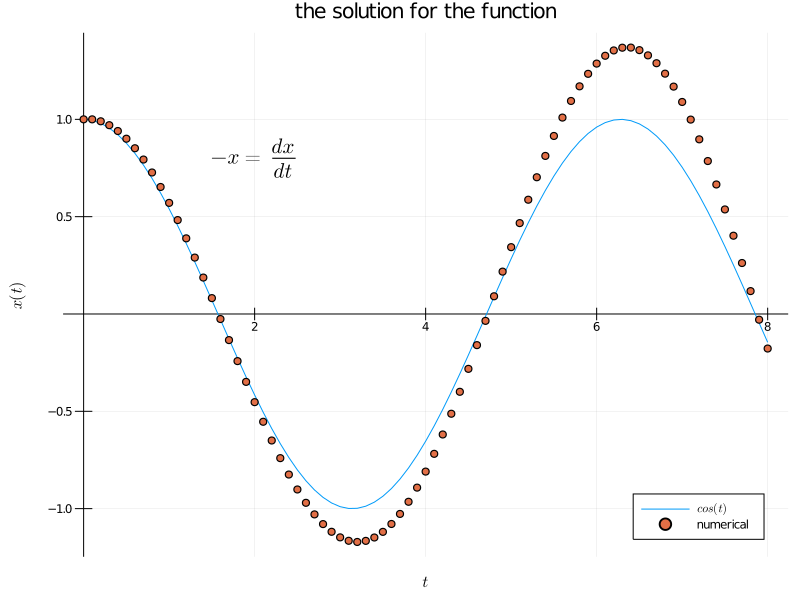

In [12]:
#绘制图所示
plot(size=(800, 600),title="the solution for the function",xlabel=L"t", ylabel=L"x(t)",
    framestyle=:origin,leg=:bottomright)
plot!(t, cos.(t), label=L"cos(t)")
scatter!(t, x, label="numerical")
annotate!(1.5, 0.8, Plots.text(L"-x=\frac{dx}{dt}", :left))

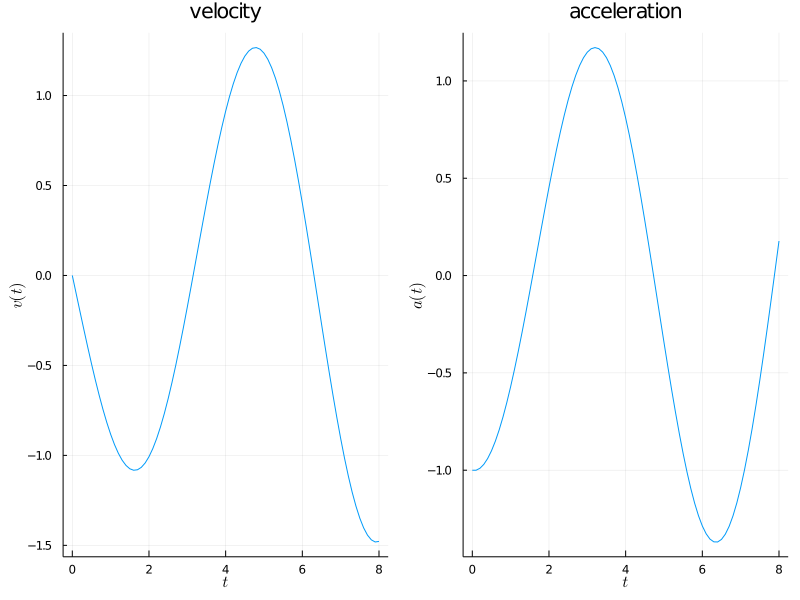

In [15]:
#速度，加速度图像
p1 = plot(t, v, xlabel=L"t", ylabel=L"v(t)", leg=:none, title="velocity")
p2 = plot(t, a, xlabel=L"t", ylabel=L"a(t)", leg=:none, title="acceleration")
plot(p1, p2, size=(800, 600))

如果将时间间隔减小：

$\varepsilon = 0.01s$

或者更小：

$\varepsilon = 0.001s$


In [16]:
ε₁, ε₂, ε₃ = 0.1, 0.01, 0.001
function Calculate_xva(n,b)
	t = [0+i*b for i=0:n]
	x = fill(1.0, size(t))
	v = fill(0.0, size(t))
	a = fill(-1.0, size(t))
	
	for i = 2:length(t)
		x[i] = x[i-1]+b * v[i-1] 
		v[i] = v[i-1]-b * x[i-1]
		a[i] = -x[i]
	end
	return DataFrame(t=t, x=x, v=v, a=a)
end

Calculate_xva (generic function with 1 method)

In [18]:
#分别计算
Dt1 = Calculate_xva(80, ε₁)
Dt2 = Calculate_xva(800, ε₂)
Dt3 = Calculate_xva(8000, ε₃)
#按一定间隔取用计算的结果
Dt = Dt2[1:10:nrow(x),:];

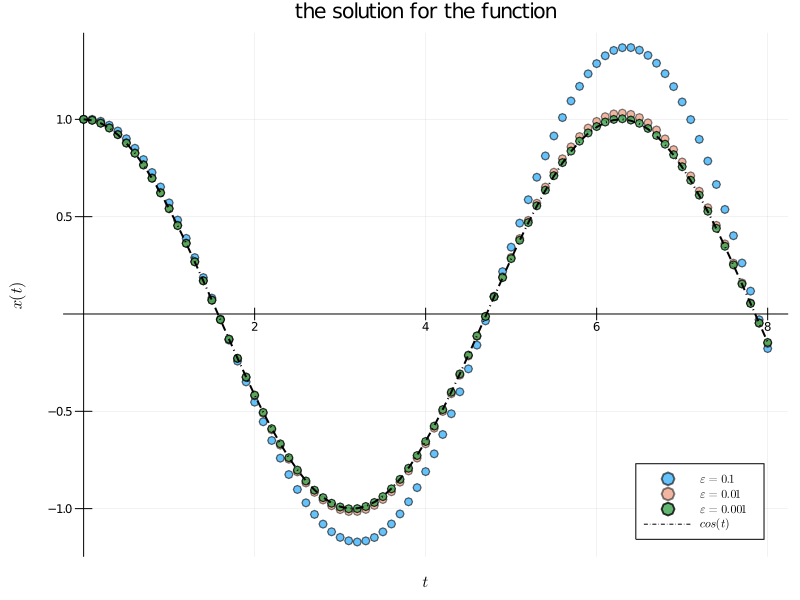

In [27]:
plot(title="the solution for the function",xlabel=L"t", ylabel=L"x(t)", leg=:bottomright, size=(800, 600), framestyle=:origin)
scatter!(Dt1.t, Dt1.x, label=L"\varepsilon=0.1",alpha = 0.6, shape=:o)
scatter!(Dt2[1:10:nrow(Dt2),:].t, Dt2[1:10:nrow(Dt2),:].x, label=L"\varepsilon = 0.01", alpha=0.5,shape=:o)
scatter!(Dt3[1:100:nrow(Dt3),:].t, Dt3[1:100:nrow(Dt3),:].x, label=L"\varepsilon = 0.001", alpha=0.8,shape=:o)
plot!(Dt1.t, cos.(Dt1.t), label=L"cos(t)", c=:black, lw = 2, linestyle = :dashdot)

## 行星运动轨迹数值计算
假设恒星在点 $(0, 0)$,行星点在$(x, y)$

$F = G\frac{Mm}{r^2}$

在X-axis:

$\frac{|F|_x}{x} = \frac{G\frac{Mm}{r^2}}{r}$

$m\frac{dv_x}{dt} = -\frac{GMmx}{r^3}$

在Y-axis:

$\frac{|F|_y}{y} = \frac{G\frac{Mm}{r^2}}{r}$

$m\frac{dv_y}{dt} = -\frac{GMmy}{r^3}$

假定$GM=1$:

$\frac{dv_x}{dt} = -\frac{x}{r^3}$
$\frac{dv_y}{dt} = -\frac{y}{r^3}$

如果$t = 0, x(t=0) = 0.5, y(t=0) = 0.0, v_x(t=0) = 0.0, v_y(t=0) = 1.50$

我们可以像上一样计算:

In [32]:
δ = 0.001
plane_time = [0+i*δ for i = 0:5000]

plane_x = fill(0.5, size(plane_time))
plane_y = fill(0.0, size(plane_time))
plane_vx = fill(0.0, size(plane_time))
plane_vy = fill(1.50, size(plane_time))
plane_r = fill(0.5, size(plane_time))

for i = 2:length(plane_time)
	plane_x[i] = plane_x[i-1] + δ * plane_vx[i-1]
	plane_y[i] = plane_y[i-1] + δ * plane_vy[i-1]
	plane_vx[i] = plane_vx[i-1] - δ * plane_x[i-1]/plane_r[i-1]^3
	plane_vy[i] = plane_vy[i-1] - δ * plane_y[i-1]/plane_r[i-1]^3
	plane_r[i] = sqrt(plane_x[i]^2 + plane_y[i]^2)
end

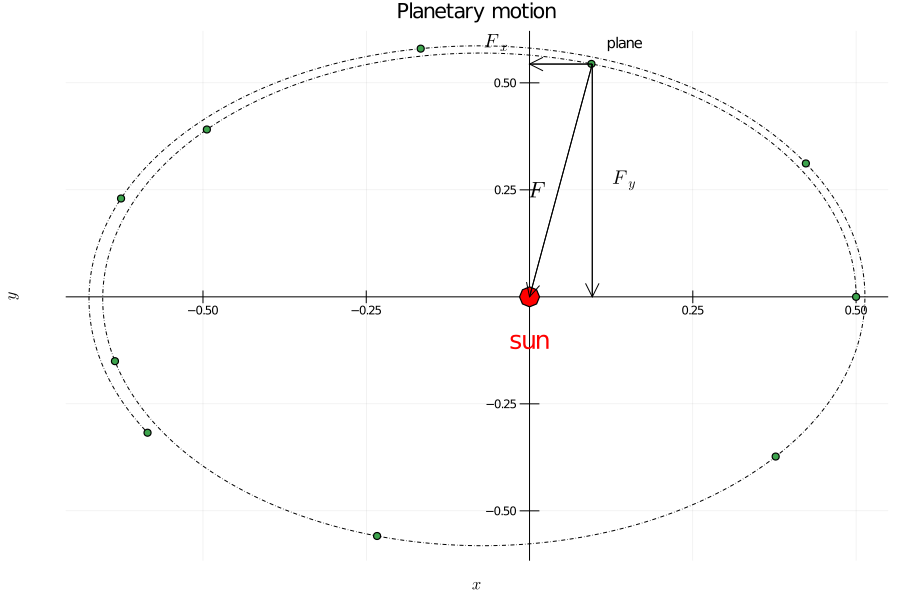

In [39]:
#绘制图如下
plot(plane_x, plane_y, leg=:none, xlabel=L"x", ylabel=L"y",
    framestyle=:origin,size=(900, 600), title="Planetary motion", linestyle=:dashdot, c="black")
scatter!([0.0], [0.0],marker = (10, 1.0, :red), shape=:o)
scatter!(plane_x[1:500:5000], plane_y[1:500:5000])

quiver!([plane_x[500]], [plane_y[500]], quiver=([-plane_x[500]], [-plane_y[500]]), c=:black)
quiver!([plane_x[500]], [plane_y[500]], quiver=([-plane_x[500]], [0.0]), c=:black)
quiver!([plane_x[500]], [plane_y[500]], quiver=([0.0], [-plane_y[500]]), c=:black)
annotate!(0.01, 0.25, text(L"F", :black,15))
annotate!(0.0, -0.1, text("sun", :red, 17))
annotate!(plane_x[500]+0.05, plane_y[500]+0.05, text("plane", 10))
annotate!(plane_x[500]+0.05, plane_y[500]/2, text(L"F_y", :black, 13))
annotate!(-0.05, plane_y[500]+0.05, text(L"F_x", :black, 13))